In [1]:
import os
os.chdir('../scripts')
from analysis_tools_cython import *

In [2]:
data = pd.read_csv('../candidates/candidates-full.csv')
#data = data[data['class'] == 'yellow']

In [3]:
lc = data[data['TIC_ID'] == 349966800]

349966800


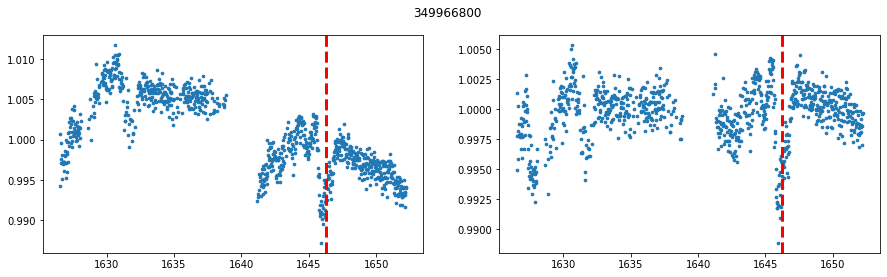

349966800


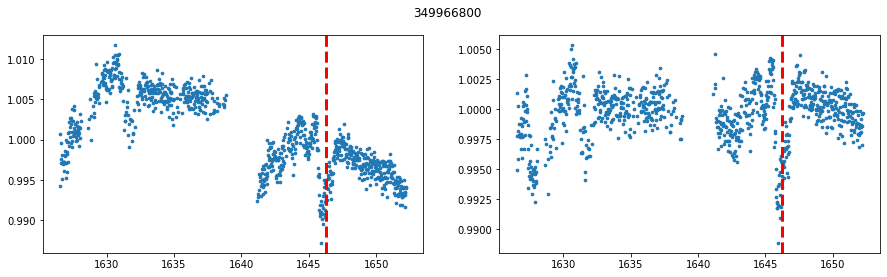

In [4]:
for i in lc.abs_path: #4 x 4 grid for illustration purposes
    #print(len(data_new[(data_new.asym_score >=0.9) & (data_new.asym_score <= 1) & (abs(data_new.depth) >= 0.1)]))
    lc, lc_info = import_lightcurve(i)
    lc = lc['TIME','PCA_FLUX','QUALITY','FLUX_ERR','FLUX_BKG','X_CENTROID','Y_CENTROID','CORR_FLUX','RAW_FLUX']
    fig, ax = plt.subplots(1,2,figsize=(15,4))
    print(lc_info[0])
    ax[0].scatter(lc['TIME'],lc['RAW_FLUX']/np.median(lc['RAW_FLUX']),s=7)
    ax[0].axvline(data[data.TIC_ID == lc_info[0]].time.values[0],linestyle='--',linewidth=3,color='red')
    ax[1].scatter(lc['TIME'],lc['PCA_FLUX']/np.median(lc['PCA_FLUX']),s=7)
    ax[1].axvline(data[data.TIC_ID == lc_info[0]].time.values[0],linestyle='--',linewidth=3,color='red')
    #_, _ = processing(lc,lc_info=lc_info,method='median',make_plots=True)
    fig.suptitle(f"{lc_info[0]}")
    plt.show()
    

In [7]:
from astropy.io import fits

In [9]:
hdul = fits.open('/storage/astro2/phrdhx/eleanor-lite-project-v2/s0001/hlsp_gsfc-eleanor-lite_tess_ffi_s0001-0000000308851209_tess_v1.0_lc.fits')